In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


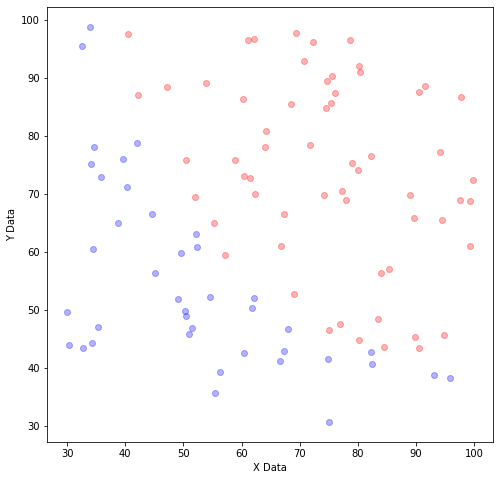

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import csv

data    = np.genfromtxt("/content/drive/My Drive/data.txt", delimiter=',')

x_data       = data[:, 0]
y_data       = data[:, 1]
label        = data[:, 2]

x_label0    = x_data[label == 0]
x_label1    = x_data[label == 1]

y_label0    = y_data[label == 0]
y_label1    = y_data[label == 1]

plt.figure(figsize=(8, 8))
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()


In [0]:
import math

theta0 = float(-60)
theta1 = float(-5)
theta2 = float(5)

new_theta0 = float(0)
new_theta1 = float(0)
new_theta2 = float(0)

m = float(len(x_data))
learning_rate = float(0.01)

gradient_theta0 = float(0)
gradient_theta1 = float(0)
gradient_theta2 = float(0)

space_theta0 = []
space_theta1 = []
space_theta2 = []

for i in range(10000):
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    
    sub_func = 1 / (1 + math.exp( -1 * ( theta0 + (theta1 * x) + (theta2 * y) ) ))

    gradient_theta0 += (sub_func - l) / m
    gradient_theta1 += ( (sub_func - l) * x ) / m
    gradient_theta2 += ( (sub_func - l) * y ) / m

  new_theta0 = theta0 - (learning_rate * gradient_theta0)
  new_theta1 = theta1 - (learning_rate * gradient_theta1)
  new_theta2 = theta2 - (learning_rate * gradient_theta2) 
  
  gradient_theta0 = float(0)
  gradient_theta1 = float(0)
  gradient_theta2 = float(0)  #초기화

  theta0 = new_theta0
  theta1 = new_theta1
  theta2 = new_theta2

  space_theta0.append(theta0)
  space_theta1.append(theta1)
  space_theta2.append(theta2)

print('theta0 =', theta0)
print('theta1 =', theta1)
print('theta2 =', theta2)


theta0 = -59.7522084095978
theta1 = 0.47337679001582833
theta2 = 0.4691631260114771


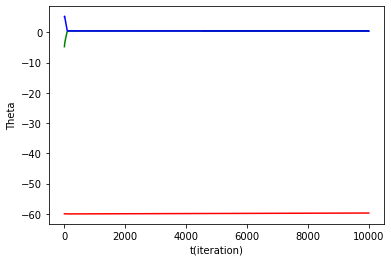

In [0]:
x = range(10000)
y1 = space_theta0[:10000]
y2 = space_theta1[:10000]
y3 = space_theta2[:10000]

plt.xlabel('t(iteration)')
plt.ylabel('Theta')
plt.plot(x, y1, 'red', x, y2, 'green', x, y3, 'blue')
plt.show()

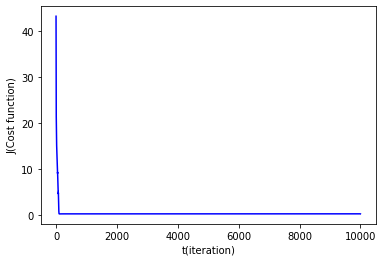

In [0]:
import math

result = float(0)
sub_func = float(0)
J = []


for i in range(len(space_theta0)):
  theta0 = space_theta0[i]
  theta1 = space_theta1[i]
  theta2 = space_theta2[i]
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]
    sub_func = 1 / (1 + math.exp( -1 * ( theta0 + (theta1 * x) + (theta2 * y) ) ))

    if (sub_func >= 1):
      sub_func = 0.99999

    left = float(math.log(sub_func))
    right = float(math.log(1 - sub_func))             # 바로 result에 삽입했더니 문제가 생겨서 left와 right로 쪼개서 식에 대입함.
                                                      # 세세히 확인해보니 right파트에서 sub_func이 반올림 되서 1의 값을 가지는 경우가 생기는데
                                                      # 이 값이 log (1 - right) 가 되면서 마이너스 무한대의 값을 가져서 에러가 남
                                                      # 따라서 if문을 통해서 1이 아닌 0.99999로 값을 바꿔주었음.

    result += ( (-1 * l * left) + ((l - 1) * right) ) / m
  J.append(result)
  result = float(0)


x = range(10000)
plt.xlabel('t(iteration)')
plt.ylabel('J(Cost function)')
plt.plot(x, J, 'blue')
plt.show()



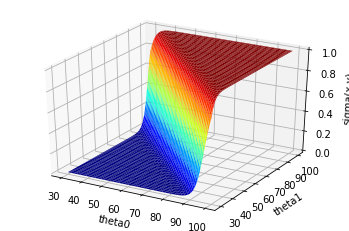

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

ax = plt.figure()
grp = plt.axes(projection='3d')
grp.set_xlabel('theta0')
grp.set_ylabel('theta1')
grp.set_zlabel('sigma(x,y)')

X = np.arange(float(30), float(100), float(0.5))
Y = np.arange(float(30), float(100), float(0.5))
X, Y = np.meshgrid(X, Y)
P = 1 / (1 + np.exp(- 1 * (theta0 + (theta1 * X) + (theta2 * Y))))          # math.,exp 함수를 이용하면 차원의 문제로
grp.plot_surface(X,Y,P, cmap='jet')                                         # 에러가 발생함. 이 문제로 고생을 좀 했음.
plt.show()


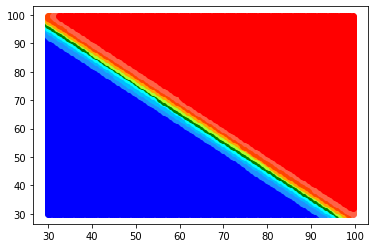

In [0]:
xvalue = np.arange(float(30), float(100), float(0.5))
yvalue = np.arange(float(30), float(100), float(0.5))

rgn1_x = []
rgn1_y = []
rgn2_x = []
rgn2_y = []
rgn3_x = []
rgn3_y = []
rgn4_x = []
rgn4_y = []
rgn5_x = []
rgn5_y = []
rgn6_x = []
rgn6_y = []
rgn7_x = []
rgn7_y = []
rgn8_x = []
rgn8_y = []
rgn9_x = []
rgn9_y = []
rgn10_x = []
rgn10_y = []

for i in range(len(xvalue)):
  for j in range(len(yvalue)):

    result = 1 / (1 + np.exp(- 1 * (theta0 + (theta1 * xvalue[i]) + (theta2 * yvalue[j]))))

    if result <= 0.1:
      rgn1_x.append(xvalue[i])
      rgn1_y.append(yvalue[j])

    elif result <= 0.2:
      rgn2_x.append(xvalue[i])
      rgn2_y.append(yvalue[j])

    elif result <= 0.3:
      rgn3_x.append(xvalue[i])
      rgn3_y.append(yvalue[j])

    elif result <= 0.4:
      rgn4_x.append(xvalue[i])
      rgn4_y.append(yvalue[j])

    elif result <= 0.5:
      rgn5_x.append(xvalue[i])
      rgn5_y.append(yvalue[j])

    elif result <= 0.6:
      rgn6_x.append(xvalue[i])
      rgn6_y.append(yvalue[j])

    elif result <= 0.7:
      rgn7_x.append(xvalue[i])
      rgn7_y.append(yvalue[j])

    elif result <= 0.8:
      rgn8_x.append(xvalue[i])
      rgn8_y.append(yvalue[j])

    elif result <= 0.9:
      rgn9_x.append(xvalue[i])
      rgn9_y.append(yvalue[j])

    else:
      rgn10_x.append(xvalue[i])
      rgn10_y.append(yvalue[j])
    
plt.figure()
plt.scatter(rgn1_x, rgn1_y, c = 'blue')
plt.scatter(rgn2_x, rgn2_y, c = 'dodgerblue')
plt.scatter(rgn3_x, rgn3_y, c = 'deepskyblue')
plt.scatter(rgn4_x, rgn4_y, c = 'cyan')
plt.scatter(rgn5_x, rgn5_y, c = 'green')
plt.scatter(rgn6_x, rgn6_y, c = 'greenyellow')
plt.scatter(rgn7_x, rgn7_y, c = 'orange')
plt.scatter(rgn8_x, rgn8_y, c = 'orangered')
plt.scatter(rgn9_x, rgn9_y, c = 'tomato')
plt.scatter(rgn10_x, rgn10_y, c = 'red')

plt.show()